# <center> Лабораторная работа №6
## <center> "Ансамбли моделей машинного обучения"

**Цель лабораторной работы:** изучение ансамблей моделей машинного обучения

**Задание**
    
    1. Выберите набор данных (датасет) для решения задачи классификации или регресии.
    2. В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
    3. С использованием метода train_test_split разделите выборку на обучающую и тестовую.
    4. Обучите две ансамблевые модели. Оцените качество моделей с помощью одной из подходящих для задачи метрик. Сравните качество полученных моделей.


Для лабораторной работы будем использовать набор данных о медицинской страховке.

Колонки:

 - `age` - возраст
 - `sex` - пол
 - `bmi` - индекс массы тела
 - `children` - кол-во детей
 - `smoker` - курит/не курит
 - `region` - регион проживания в США
 - `charges` - плата за мед. обслуживание

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_absolute_error, mean_squared_error,  median_absolute_error, r2_score 

In [2]:
# Таблица данных
data = pd.read_csv('../Dataset/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Размер набора данных
data.shape

(1338, 7)

In [4]:
# Типы данных в колонках
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

## Подготовка к анализу данных

### Проверка на пропущенные значения

In [5]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Пропущенных значений нет

### Основные статистические показатели для каждого параметра

In [6]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Преообразование категориальных признаков в числовые

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
le = LabelEncoder()
    # "sex" - пол
le.fit(data.sex.drop_duplicates()) 
data.sex = le.transform(data.sex)
    # "smoker" - курение
le.fit(data.smoker.drop_duplicates()) 
data.smoker = le.transform(data.smoker)
    # "region" - регион
le.fit(data.region.drop_duplicates()) 
data.region = le.transform(data.region)

In [9]:
data. head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [10]:
data.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


## 1. Тестовая и обучающая выборки

Подключим необходимый метод train_test_split из библиотек sklearn для разделения выборки на тестовую и обучающую

In [11]:
from sklearn.model_selection import train_test_split

### 1.1. Разделение выборки на входные и выходные данные

Задача регрессии будет состоять в предсказании платы за медицинское обслуживание на основании других параметров, в связи с этим следующее распределение входных и выходных параметров:

In [12]:
X = data.drop(['charges'], axis = 1)
Y = data.charges
print('Входные данные:\n\n', X.head(), '\n\nВыходные данные:\n\n', Y.head())

Входные данные:

    age  sex     bmi  children  smoker  region
0   19    0  27.900         0       1       3
1   18    1  33.770         1       0       2
2   28    1  33.000         3       0       2
3   33    1  22.705         0       0       1
4   32    1  28.880         0       0       1 

Выходные данные:

 0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64


### 1.2. Разделим выборку на обучающую и тестовую

Размер тестовой выборки определим: 10%

In [13]:
X_train,  X_test,  Y_train,  Y_test = train_test_split(X,  Y, random_state = 0, test_size = 0.1)
print('Входные параметры обучающей выборки:\n\n',X_train.head(), \
      '\n\nВходные параметры тестовой выборки:\n\n', X_test.head(), \
      '\n\nВыходные параметры обучающей выборки:\n\n', Y_train.head(), \
      '\n\nВыходные параметры тестовой выборки:\n\n', Y_test.head())

Входные параметры обучающей выборки:

      age  sex    bmi  children  smoker  region
461   42    1  30.00         0       1       3
322   34    1  30.80         0       1       3
224   42    1  24.64         0       1       2
711   50    0  23.54         2       0       2
58    53    0  22.88         1       1       2 

Входные параметры тестовой выборки:

       age  sex     bmi  children  smoker  region
578    52    1  30.200         1       0       3
610    47    0  29.370         1       0       2
569    48    1  40.565         2       1       1
1034   61    1  38.380         0       0       1
198    51    0  18.050         0       0       1 

Выходные параметры обучающей выборки:

 461    22144.0320
322    35491.6400
224    19515.5416
711    10107.2206
58     23244.7902
Name: charges, dtype: float64 

Выходные параметры тестовой выборки:

 578      9724.53000
610      8547.69130
569     45702.02235
1034    12950.07120
198      9644.25250
Name: charges, dtype: float64


Проверим:

In [14]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print (round(X_test.shape[0]/(X_test.shape[0]+X_train.shape[0]), 2))

(1204, 6)
(134, 6)
(1204,)
(134,)
0.1


## 1. Случайный лес

### 1.1. Построение случайного леса

Построим случайный лес из 5 деревьев

Подключим необходимый класс RandomForestRegressor из библиотек sklearn для построения случайного леса

In [16]:
from sklearn.ensemble import RandomForestRegressor

In [17]:
forest_1 = RandomForestRegressor(n_estimators=5, oob_score=True, random_state=10)
forest_1.fit(X, Y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
                      oob_score=True, random_state=10, verbose=0,
                      warm_start=False)

In [18]:
Y_predict = forest_1.predict(X_test)
print('Средняя абсолютная ошибка:',   mean_absolute_error(Y_test, Y_predict))
print('Средняя квадратичная ошибка:', mean_squared_error(Y_test, Y_predict))
print('Median absolute error:',       median_absolute_error(Y_test, Y_predict))
print('Коэффициент детерминации:',    r2_score(Y_test, Y_predict))

Средняя абсолютная ошибка: 1310.9760416268655
Средняя квадратичная ошибка: 7351158.620276929
Median absolute error: 174.6405249999998
Коэффициент детерминации: 0.962088561207213


Коэффициент детерминации оцень хороший. 
Однако оценки ошибок все же оставляют желать лучшего.

**Построим график по полученным значениям**

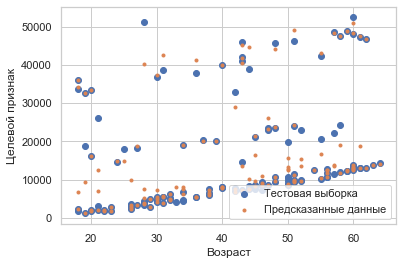

In [19]:
plt.scatter(X_test.age, Y_test,    marker = 'o', label = 'Тестовая выборка')
plt.scatter(X_test.age, Y_predict, marker = '.', label = 'Предсказанные данные')
plt.legend(loc = 'lower right')
plt.xlabel('Возраст')
plt.ylabel('Целевой признак')
plt.show()

Вспомним показатели с полиномиальным регрессором в методе опорных векторов из пятой лабораторной работы и сравним полученные результаты с теми показателями

In [21]:
from sklearn.svm import SVR

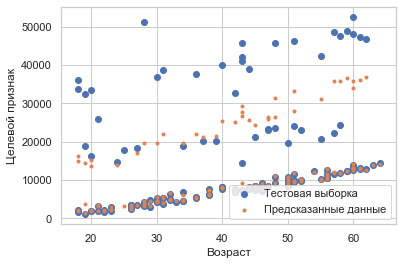

In [23]:
X1 = data.drop(['charges'], axis = 1)
Y1 = data.charges
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, random_state=0, test_size = 0.1)

polySVR = SVR(kernel='poly', degree=2, gamma=0.2, C=1.0)
polySVR.fit(X_train, Y_train)
svr_y_pred = polySVR.predict(X_test)

plt.scatter (X_test.age, Y_test,     marker = 'o', label = 'Тестовая выборка')
plt.scatter (X_test.age, svr_y_pred, marker = '.', label = 'Предсказанные данные')
plt.legend (loc = 'lower right')
plt.xlabel ('Возраст')
plt.ylabel ('Целевой признак')
plt.show ()

In [24]:
print('Средняя абсолютная ошибка:',   mean_absolute_error(Y_test, svr_y_pred))
print('Средняя квадратичная ошибка:', mean_squared_error(Y_test, svr_y_pred))
print('Median absolute error:',       median_absolute_error(Y_test, svr_y_pred))
print('Коэффициент детерминации:',    r2_score(Y_test, svr_y_pred))

Средняя абсолютная ошибка: 3813.133510131853
Средняя квадратичная ошибка: 57416441.13999922
Median absolute error: 182.66305363577385
Коэффициент детерминации: 0.703891589555071


По графикам видно, что метод случайного леса работает лучше с распределенными данными, но при кучных значениях, он попадает в них не так точно.
А если посмотреть на показатели оценки метрик, то сразу станет ясно, что Случайный лес работает значительно лучше

### 1.2. Нахождение лучшего случайного леса

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
params = {
    'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 50, 75, 100],
    'max_features': [0.2, 0.3, 0.4, 0.6, 0.8, 0.9, 1.0],
    'min_samples_leaf': [0.01, 0.04, 0.06, 0.08, 0.1]
}

In [27]:
grid_1 = GridSearchCV(estimator=RandomForestRegressor(oob_score=True, random_state=10),
                      param_grid=params, 
                      scoring='neg_mean_squared_error', 
                      cv=3,
                      n_jobs=-1)
grid_1.fit(X, Y)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=True, random_state=10,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_features': [0.2, 0.3, 0.4, 0.6,

In [28]:
print('Лучший показатель средней квадратичной ошибки:', -grid_1.best_score_)
print('Параметры для данного показателя:\n',            grid_1.best_params_)

Лучший показатель средней квадратичной ошибки: 20658459.544196565
Параметры для данного показателя:
 {'max_features': 0.9, 'min_samples_leaf': 0.01, 'n_estimators': 75}


In [29]:
forest_2 = RandomForestRegressor(n_estimators=75, max_features = 0.9, min_samples_leaf = 0.01, oob_score=True, random_state=10)
forest_2.fit(X, Y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=0.9, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=0.01, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=75,
                      n_jobs=None, oob_score=True, random_state=10, verbose=0,
                      warm_start=False)

In [31]:
Y_predict2 = forest_2.predict(X_test)

In [32]:
print('Средняя абсолютная ошибка:',mean_absolute_error(Y_test, Y_predict2))
print('Средняя квадратичная ошибка:',mean_squared_error(Y_test, Y_predict2))
print('Median absolute error:',median_absolute_error(Y_test, Y_predict2))
print('Коэффициент детерминации:',r2_score(Y_test, Y_predict2))

Средняя абсолютная ошибка: 2169.2865134606063
Средняя квадратичная ошибка: 12215022.257308098
Median absolute error: 1450.699712503978
Коэффициент детерминации: 0.9370046148394738


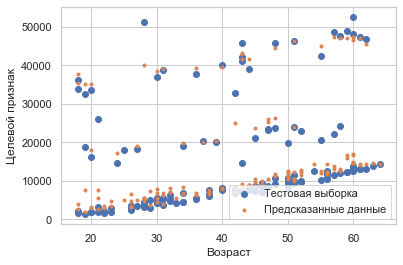

In [33]:
plt.scatter (X_test.age, Y_test,     marker = 'o', label = 'Тестовая выборка')
plt.scatter (X_test.age, Y_predict2, marker = '.', label = 'Предсказанные данные')
plt.legend (loc = 'lower right')
plt.xlabel ('Возраст')
plt.ylabel ('Целевой признак')
plt.show()

Судя по оценкам, точность этого леса действительно уухудшилась, это же можно наблюдать и на графике: предсказанные данные больше не совпадают с тестовой выборкой, нежели как это было на графике первого леса. То есть нельзя сказать, что данное дерево действительно лучше.

Попробуем убрать из набора параметров мин. кол-во данных в листе min_samples_leaf и заново провести кросс-валидацию.

In [34]:
params2 = {
    'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 50, 75, 100],
    'max_features': [0.2, 0.3, 0.4, 0.6, 0.8, 0.9, 1.0]
}

In [35]:
grid_2 = GridSearchCV(estimator=RandomForestRegressor(oob_score=True, random_state=10),
                      param_grid=params2, 
                      scoring='neg_mean_squared_error', 
                      cv=3, 
                      n_jobs=-1)
grid_2.fit(X, Y)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=True, random_state=10,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_features': [0.2, 0.3, 0.4, 0.6,

In [36]:
print('Лучший показатель средней квадратичной ошибки:', -grid_2.best_score_)
print('Параметры для данного показателя:\n',            grid_2.best_params_)

Лучший показатель средней квадратичной ошибки: 23068300.96479446
Параметры для данного показателя:
 {'max_features': 0.6, 'n_estimators': 100}


In [37]:
forest_3 = RandomForestRegressor(n_estimators=100, max_features = 0.6, oob_score=True, random_state=10)
forest_3.fit(X, Y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=0.6, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=True, random_state=10, verbose=0,
                      warm_start=False)

In [39]:
Y_predict3 = forest_3.predict(X_test)

In [40]:
print('Средняя абсолютная ошибка:',   mean_absolute_error(Y_test, Y_predict3))
print('Средняя квадратичная ошибка:', mean_squared_error(Y_test, Y_predict3))
print('Median absolute error:',       median_absolute_error(Y_test, Y_predict3))
print('Коэффициент детерминации:',    r2_score(Y_test, Y_predict3))

Средняя абсолютная ошибка: 886.0426162113685
Средняя квадратичная ошибка: 2232907.380392612
Median absolute error: 515.152144149969
Коэффициент детерминации: 0.9884844368276564


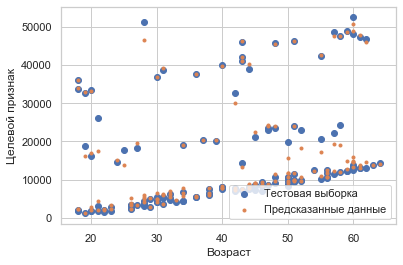

In [41]:
plt.scatter (X_test.age, Y_test,     marker = 'o', label = 'Тестовая выборка')
plt.scatter (X_test.age, Y_predict3, marker = '.', label = 'Предсказанные данные')
plt.legend (loc = 'lower right')
plt.xlabel ('Возраст')
plt.ylabel ('Целевой признак')
plt.show ()

    Показатели точности стали сильно лучше
    На графике видно хорошее совпадение тестовой выборки и предсказанных данных, хотя при возрасте от 50 до 60 заметно расхождение в данных.

## 2. Градиентный бустинг

Построим ансамбль из 5 моделей

Подключим необходимый класс GradientBoostingRegressor из библиотек sklearn для построения ансамбля

In [43]:
from sklearn.ensemble import GradientBoostingRegressor

In [45]:
grad = GradientBoostingRegressor(n_estimators=5, random_state = 10)
grad.fit(X_train, Y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=5,
                          n_iter_no_change=None, presort='auto',
                          random_state=10, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [46]:
Y_grad_pred = grad.predict(X_test)

In [48]:
print('Средняя абсолютная ошибка:',   mean_absolute_error(Y_test, Y_grad_pred))
print('Средняя квадратичная ошибка:', mean_squared_error(Y_test, Y_grad_pred))
print('Median absolute error:',       median_absolute_error(Y_test, Y_grad_pred))
print('Коэффициент детерминации:',    r2_score(Y_test, Y_grad_pred))

Средняя абсолютная ошибка: 6727.197262322547
Средняя квадратичная ошибка: 81404004.45060879
Median absolute error: 5047.509739741814
Коэффициент детерминации: 0.5801827859210638


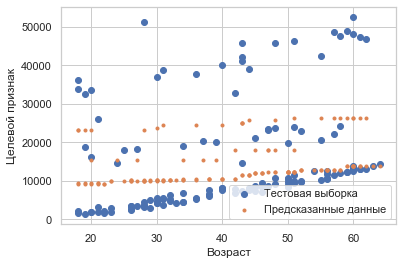

In [49]:
plt.scatter (X_test.age, Y_test,      marker = 'o', label = 'Тестовая выборка')
plt.scatter (X_test.age, Y_grad_pred, marker = '.', label = 'Предсказанные данные')
plt.legend (loc = 'lower right')
plt.xlabel ('Возраст')
plt.ylabel ('Целевой признак')
plt.show ()

Без подбора гиперпараметров ансамбль работает очень плохо

Для улучшения применим кросс-валидацию.

In [50]:
params = {
    'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 50, 75, 100],
    'max_features': [0.2, 0.3, 0.4, 0.6, 0.8, 0.9, 1.0],
    'min_samples_leaf': [0.01, 0.04, 0.06, 0.08, 0.1]
}

In [51]:
grid_gr = GridSearchCV(estimator=GradientBoostingRegressor(random_state=10),
                       param_grid=params,
                       scoring='neg_mean_squared_error',
                       cv=3,
                       n_jobs=-1)
grid_gr.fit(X, Y)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter...
                             

In [52]:
print('Лучший показатель средней квадратичной ошибки:', -grid_gr.best_score_)
print('Параметры для данного показателя:\n',            grid_gr.best_params_)

Лучший показатель средней квадратичной ошибки: 20349467.277887657
Параметры для данного показателя:
 {'max_features': 1.0, 'min_samples_leaf': 0.04, 'n_estimators': 50}


In [53]:
grad1 = GradientBoostingRegressor(n_estimators=50, max_features = 1.0, min_samples_leaf = 0.04, random_state = 10)
grad1.fit(X_train, Y_train)
Y_grad_pred1 = grad1.predict(X_test)

Оценим полученный ансамбль

In [56]:
print('Средняя абсолютная ошибка:',   mean_absolute_error(Y_test, Y_grad_pred1))
print('Средняя квадратичная ошибка:', mean_squared_error(Y_test, Y_grad_pred1))
print('Median absolute error:',       median_absolute_error(Y_test, Y_grad_pred1))
print('Коэффициент детерминации:',    r2_score(Y_test, Y_grad_pred1))

Средняя абсолютная ошибка: 2320.929707623254
Средняя квадратичная ошибка: 14354148.990339017
Median absolute error: 1602.8507813116803
Коэффициент детерминации: 0.925972697777363


Построим график для визуального сравнения

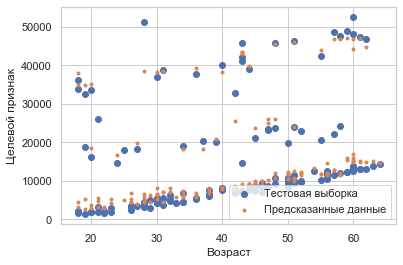

In [57]:
plt.scatter (X_test.age, Y_test,       marker = 'o', label = 'Тестовая выборка')
plt.scatter (X_test.age, Y_grad_pred1, marker = '.', label = 'Предсказанные данные')
plt.legend (loc = 'lower right')
plt.xlabel ('Возраст')
plt.ylabel ('Целевой признак')
plt.show()

Показатели значительно улучшились. Но до сих пор заметно расхождение между предсказанными данными и тестовой выборкой.

Попробуем провести кросс-валидацию без учета параметра min_samples_leaf, как мы делали со Случайным лесом.

In [58]:
params1 = {
    'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 50, 75, 100],
    'max_features': [0.2, 0.3, 0.4, 0.6, 0.8, 0.9, 1.0]
}

In [59]:
grid_gr1 = GridSearchCV(estimator = GradientBoostingRegressor(random_state=10),
                        param_grid = params1,
                        scoring = 'neg_mean_squared_error',
                        cv = 3,
                        n_jobs = -1)
grid_gr1.fit(X, Y)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter...ne,
                          

In [60]:
print('Лучший показатель средней квадратичной ошибки:', -grid_gr1.best_score_)
print('Параметры для данного показателя:\n',            grid_gr1.best_params_)

Лучший показатель средней квадратичной ошибки: 20517355.12930149
Параметры для данного показателя:
 {'max_features': 0.9, 'n_estimators': 50}


In [61]:
grad2 = GradientBoostingRegressor(n_estimators = 50, max_features = 0.9, random_state = 10)
grad2.fit(X_train, Y_train)
Y_grad_pred2 = grad2.predict(X_test)

Оценим полученный ансамбль

In [62]:
print('Средняя абсолютная ошибка:',   mean_absolute_error(Y_test, Y_grad_pred2))
print('Средняя квадратичная ошибка:', mean_squared_error(Y_test, Y_grad_pred2))
print('Median absolute error:',       median_absolute_error(Y_test, Y_grad_pred2))
print('Коэффициент детерминации:',    r2_score(Y_test, Y_grad_pred2))

Средняя абсолютная ошибка: 2324.5079265308377
Средняя квадратичная ошибка: 14634760.77513833
Median absolute error: 1498.18242306799
Коэффициент детерминации: 0.9245255250181452


И вновь построим график

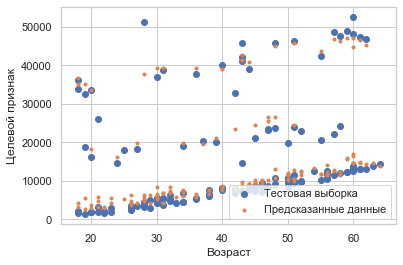

In [63]:
plt.scatter (X_test.age, Y_test,       marker = 'o', label = 'Тестовая выборка')
plt.scatter (X_test.age, Y_grad_pred2, marker = '.', label = 'Предсказанные данные')
plt.legend (loc = 'lower right')
plt.xlabel ('Возраст')
plt.ylabel ('Целевой признак')
plt.show ()

Это не помогло...

## Вывод:

Наиболее эффективным оказался метод случайного леса с подобранными параметрами. Показатель детерминации достигнул 0.99. Оценки ошибок все равно оставались не очень хорошими, но на графике было видно хорошее качество обучения.